# Fetch web page content

In [4]:
import requests

def fetch_webpage(url):
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an http error for bad responses
        return response.text #return html content
    except requests.exceptions.RequestException as e:
        print(f'Error fetching the webpage: {e}')
        return None
    

#Test the function
url = 'https://en.wikipedia.org/wiki/Web_scraping' #Example url
html_content = fetch_webpage(url)

#Output first 500 chars of response
if html_content:
    print(html_content[:500])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-


# Parse HTML Content

In [5]:
from bs4 import BeautifulSoup

def parse_html(html_content, tag, class_name=None):
    try:
        soup = BeautifulSoup(html_content, 'html.parser')
        if class_name:
            elements = soup.find_all(tag, class_=class_name)
        else:
            elements = soup.find_all(tag)
        return [element.get_text(strip=True) for element in elements]
    except Exception as e:
        print(f'Error parsing HTML: {e}')
        return []
    

#Test the function
tag = 'p' #Exctracting paragraphs
class_name = None #No specidic class
parsed_data = parse_html(html_content=html_content, tag=tag, class_name=class_name)

#Output the first 5 extracted elements
if parsed_data:
    print(parsed_data[:5])

['Web scraping,web harvesting, orweb data extractionisdata scrapingused forextracting datafromwebsites.[1]Web scraping software may directly access theWorld Wide Webusing theHypertext Transfer Protocolor a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using abotorweb crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central localdatabaseorspreadsheet, for laterretrievaloranalysis.', 'Scraping a web page involves fetching it and then extracting data from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Having fetched, extraction can take place. The content of a page may beparsed, searched and reformatted, and its data copied into a spreadsheet or loaded into a database. Web scrapers typically take someth

# Convert Data into DataFrame

In [6]:
import pandas as pd


def convert_to_dataframe(data, column_name='Extracted Content'):
    try:
        df = pd.DataFrame(data, columns=[column_name])
        return df
    except Exception as e:
        print(f'Error creating DataFrame: {e}')
        return None
    

#Test the function
dataframe = convert_to_dataframe(parsed_data)

#Display first 5 elements of the df
if dataframe is not None:
    print(dataframe.head())

                                   Extracted Content
0  Web scraping,web harvesting, orweb data extrac...
1  Scraping a web page involves fetching it and t...
2  As well ascontact scraping, web scraping is us...
3  Web pagesare built using text-based mark-up la...
4  Newer forms of web scraping involve monitoring...


# Save Data to CSV

In [7]:
def save_to_csv(dataframe, file_name='scraped_data.csv'):
    try:
        dataframe.to_csv(file_name, index=False)
        print(f'Data saved to {file_name}')
    except Exception as e:
        print(f'Error saving to .csv: {e}')
        

#test the function
if dataframe is not None:
    save_to_csv(dataframe)

Data saved to scraped_data.csv


# Add Basic Text Analysis

In [15]:
from collections import Counter

def analyze_text(dataframe, column='Extracted Content'):
    try:
        text = ' '.join(dataframe[column])
        word_counts = Counter(text.split())
        return word_counts
    except Exception as e:
        print(f'Error analyzing text: {e}')
        return None
    
    
#Test the function
if dataframe is not None:
    word_counts = analyze_text(dataframe)
    if word_counts:
        print(word_counts.most_common(10)) #Display top 10 words

[('the', 130), ('of', 84), ('and', 77), ('to', 70), ('a', 69), ('web', 44), ('that', 35), ('in', 34), ('is', 28), ('scraping', 21)]


# Visualize

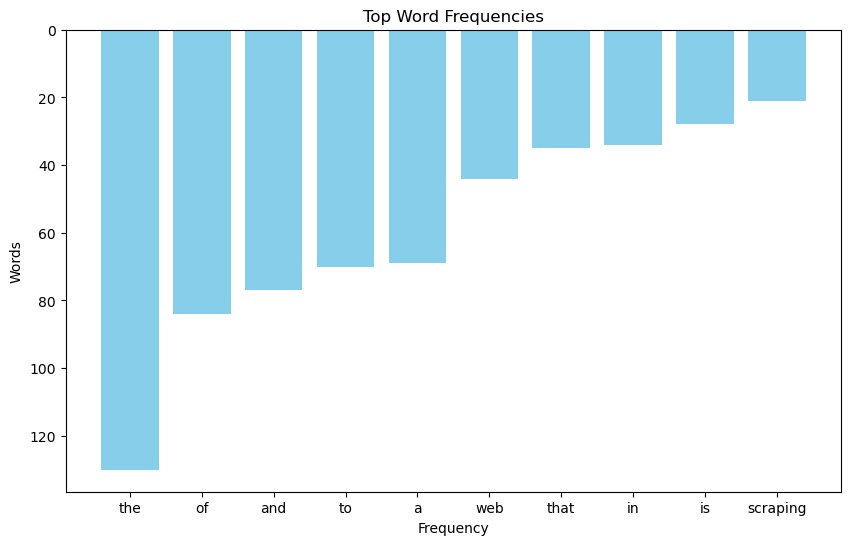

In [16]:
import matplotlib.pyplot as plt

def plot_word_frequencies(word_counts, num_words=10):
    try:
        common_words = word_counts.most_common(num_words)
        words, counts = zip(*common_words)
        
        plt.figure(figsize=(10,6))
        plt.bar(words, counts, color='skyblue')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.title('Top Word Frequencies')
        plt.gca().invert_yaxis() #Reverse the order
        plt.show()
    except Exception as e:
        print(f'Error plotting word frequencies: {e}')
     
        
#Testthe function
if word_counts:
    plot_word_frequencies(word_counts)